# High Level Outline: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Section/ Exploration](#data-prep)
* [4. Classification Modelling](#ml-model)


# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

>- The problem is to determine using ML model what customer applications can be approved for loan sanction given their particular details. 
>- It is important to the business as it can help loan department decide better who are more deserving candidates for loan sanction as indiscretion in this aspect can prove detrimental to bank's overall bottomline and annual revenue.
>- Some of the key stakeholders who would be interested in this analysis are the customers who are applying to avail a particular loan, banks who want to sanction loans to customer in various categories and various kinds of credit agencies who determine credit ratings of diferent kinds of assets depending on market demand.

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [22]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_performance_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1 Score": F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Section <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

In [23]:
# Read in data - see what we're dealing with
df = pd.read_csv('loan_approval.csv')
df.tail()

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** label (1 if loan is approved, 0 otherwise)<br><br>

---

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

>**Note:**<br>
Nothing to do as we are dealing with a clean dataset

> **Initial Cleanup: Summary of Actions**<br><br>
No missing values or dupes

---

> **Outlier Detection: Notes/Summary of Actions**<br>
<br>
>**Note:**<br>
Nothing to do as we are dealing with a clean dataset

---

> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>

>**To Do:**<br>
> 1. Include everything<br>

> **Data Partitioning** <a class="anchor" id="data-split"></a>

>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>


In [24]:
target = ['approved']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>

>We do this **after** splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>

In [25]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 4. Classification Modeling <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>1. Here we fit numerous kNN models using different values for k. <br>
>2. Then we choose the "best" value for "k" based on highest Accuracy for the minimum k value possible
>3. Plot the performance table for each model we run

In [26]:
# 1. train a classifier for different values of k
results = []
for k in [1,5,9,13,17,21,25,29,33,37,41,45,49,53]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.72
1,5,0.79
2,9,0.78
3,13,0.78
4,17,0.79
5,21,0.79
6,25,0.81
7,29,0.81
8,33,0.82
9,37,0.81


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to **33** as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=33)
knn_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn_model.predict(X_train)
y_test_pred_class = knn_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.83
Testing data Accuracy: 0.82


In [28]:
class_performance_measures(knn_model,X_test,y_test)

C:\Users\littl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1 Score,Accuracy
0,0.00,86,0,121,0,0.41,1.00,0.59,0.42
1,0.10,86,17,104,0,0.45,1.00,0.62,0.50
2,0.20,82,51,70,4,0.54,0.95,0.69,0.64
3,0.30,75,85,36,11,0.68,0.87,0.76,0.77
4,0.40,67,104,17,19,0.80,0.78,0.79,0.83
5,0.50,58,111,10,28,0.85,0.67,0.75,0.82
6,0.60,49,114,7,37,0.88,0.57,0.69,0.79
7,0.70,28,118,3,58,0.90,0.33,0.48,0.71
8,0.80,19,120,1,67,0.95,0.22,0.36,0.67
9,0.90,13,121,0,73,1.00,0.15,0.26,0.65


>**Logistic Model:**<br>
>Let's produce the same table above but this time using a Logistic Model




In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.89
Testing data Accuracy: 0.85


In [30]:
class_performance_measures(lr_model,X_test,y_test)

C:\Users\littl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1 Score,Accuracy
0,0.00,86,0,121,0,0.41,1.00,0.59,0.42
1,0.10,82,78,43,4,0.66,0.95,0.78,0.77
2,0.20,82,91,30,4,0.73,0.95,0.83,0.84
3,0.30,78,94,27,8,0.74,0.91,0.82,0.83
4,0.40,74,100,21,12,0.78,0.86,0.82,0.84
5,0.50,70,105,16,16,0.81,0.81,0.81,0.85
6,0.60,64,108,13,22,0.83,0.74,0.79,0.83
7,0.70,61,109,12,25,0.84,0.71,0.77,0.82
8,0.80,54,114,7,32,0.89,0.63,0.73,0.81
9,0.90,40,117,4,46,0.91,0.47,0.62,0.76


>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

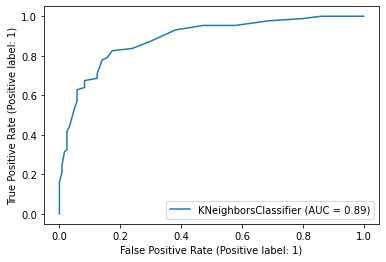

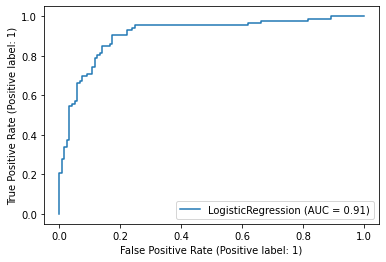

In [31]:
# ROC curve for kNN
metrics.plot_roc_curve(knn_model,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is highest for our **Logistic Regression Model** so we will use that model to further evaluate probability thresholds and associated performance measures

1. **Prob Threshold = 0.2**:
    - Relative low threshold required to predict positive outcomes.  This means we can ideally expect a LOT of positive predictions.  In our case "positive" means "**loan is approved**".  Sure enough, we DO see a lot of loan approvals in our test set being assigned to the "**approved**" class - 111 to be exact.
    - We also witness a lot of false positive (FP), which does make sense given the chosen low threshold.
    - Let's discuss the FPs - It means the loans are predicted to be approved although originally they should not be approved. In this case comapny will be taking huge risks by actually dolling out potentially huge amounts of loans to likely defaulters and will lead to incurring more number of non performing assets and extremely high bad debt expense. In our case it is 30, which should be a huge cost/risk to bear for company.
    - How about the FNs - In this case, loan is predicted not to be approved even if it should be approved based on the merits of the application. This means that banks will be losing out on interest payments to be made on the loans from good borrowers, but it will be a relatively smaller blow to company's bottomline compated to the costs incurred dute to FP's. It can also lead to incurring reputational risk as our company's service efficieny will be put into question by customers. In our case number is 4, which is a very promising number.
<br><br>
2. **Prob Threshold = 0.6**:
    - Much higher threshold required to predict positive outcomes. It means that we can expect lesser amount of positive predictions compared to picking a lower threshold.
    - By using this model, we are saying that FP's is 13, while FN's is 22, which means the company will be bearing a smaller risk of dealing with bad debt expenses as compared to dealing with far more benign risk of loosing out on interest revenue streams from a much smaller number of FN cases, because of its faulty prediction model by not approving loans to truly deserving applicants.
    - Hence we can safely conclude that this is a better threshold than 0.3.
<br><br>
3. **Prob Threshold = 0.8**:
    - This threshold means that we will ideally have lesser or equal amount of prediceted positive outcomes as compared to a lower threshold. Although our total number of predicted postives gets reduced compared to that of 0.6 probability threshold, from 77 to 61.
    - By using this model, we are saying that FP's is 7, while FN's is 32, which means the company will be bearing a a much smaller risk of dealing with bad debt expenses because of faulty prediction model but it can also potentially lose out on a significant interest revenue stream by not granting loans to derserving cases of FP's, which in this case is 32. Hence we can say that our prediction errors has changed significantly as compared to a threshold of 0.6.
    - Assuming that amount of loans taken are much larger compared to the total interest earned on loan amount that could be potentially given to applicants in cases of FP's, this is a much more promising threshold.
<br><br>
4. **Final Verdict**:
    - Based on careful consideration of probability threshold options and corresponding specultated risks/costs by keeping in mind cost-benefit analysis of FN's and FP's, I will recommend going forward with **0.8** as the threshold.
